In [1]:
# Import data
from sklearn.model_selection import train_test_split
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read Data
x = sio.loadmat('faces.mat')
print(x.keys())

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'p', 'u', 'v'])


In [3]:
x = x['faces'].T
print(x, x.shape, type(x))

[[ 75  83  83 ...  42  40  38]
 [110 108 120 ...  35  33  37]
 [ 77  75  65 ...  37  38  37]
 ...
 [121 119 113 ...  41  45  46]
 [ 52  49  51 ... 143 144 146]
 [125 125 125 ...  96  91  93]] (400, 4096) <class 'numpy.ndarray'>


In [4]:
# Shuffled Data
np.random.shuffle(x)
print(x[:3], x.shape, type(x))

[[ 81  81  80 ...  93  93  93]
 [ 96 107 120 ...  33  33  32]
 [ 35  36  41 ...  59  55  52]] (400, 4096) <class 'numpy.ndarray'>


In [5]:
train = x[:280]
test = x[281:401]

In [6]:
train, len(train)

(array([[ 81,  81,  80, ...,  93,  93,  93],
        [ 96, 107, 120, ...,  33,  33,  32],
        [ 35,  36,  41, ...,  59,  55,  52],
        ...,
        [ 57,  59,  58, ...,  31,  35,  63],
        [ 52,  51,  55, ..., 128, 114, 108],
        [148, 146, 144, ...,  51,  48,  54]], dtype=uint8), 280)

In [7]:
test, len(test)

(array([[ 70,  71,  70, ...,  86,  89,  88],
        [ 80,  85,  90, ..., 177, 183, 190],
        [ 67,  74,  82, ...,  50,  49,  48],
        ...,
        [ 89, 102, 114, ...,  38,  39,  39],
        [ 62,  62,  61, ...,  28,  28,  28],
        [ 42,  37,  35, ..., 108, 101,  84]], dtype=uint8), 119)

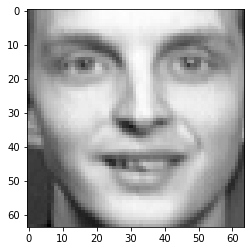

In [8]:
# Reshape Data
X = np.reshape(train, (280,64,64))
plt.imshow(X[0].T, cmap='gray')
plt.show()

In [9]:
# Calculate Mean Face
mean_face = np.mean(train, axis=0)
mean_face.shape

(4096,)

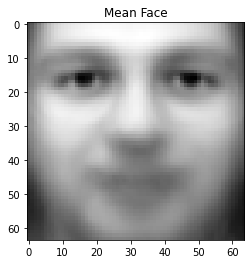

(4096,)

In [10]:
# Plot Mean Face
X = mean_face
X = np.reshape(X, (64,64))
plt.imshow(X.T, cmap='gray')
plt.title('Mean Face')
plt.show()
mean_face.shape

In [11]:
# Normalization
faces_norm = train - mean_face
faces_norm.shape

(280, 4096)

In [12]:
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(4096, 4096)

In [13]:
# Calculate Eigen Vectors and Eigen Values
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(4096, 4096)

In [14]:
print('eigen_vals:\n', eigen_vals, eigen_vals.shape)
print('eigen_vecs:\n', eigen_vecs, eigen_vecs.shape)

eigen_vals:
 [1.21719543e+06 5.53510162e+05 3.79612438e+05 ... 9.02300601e-11
 5.79803243e-11 1.42660997e-11] (4096,)
eigen_vecs:
 [[-4.54540127e-03 -2.91274109e-02 -1.27305871e-03 ... -1.59824560e-02
   1.91094672e-01 -3.09356185e-01]
 [-5.06535316e-03 -2.99992319e-02  9.77290617e-04 ...  2.08335514e-03
   7.32288799e-02 -5.06343513e-03]
 [-5.65347742e-03 -3.17907238e-02  4.43399048e-03 ...  3.04378048e-04
   7.38531086e-02  2.75423221e-01]
 ...
 [ 1.32239939e-03  2.35206208e-02  1.95386669e-02 ... -2.84427859e-02
  -7.83799435e-03 -1.53550233e-02]
 [ 2.84984962e-03  2.45562104e-02  2.01790621e-02 ...  9.55365511e-03
  -4.62147289e-03  1.62003789e-02]
 [ 3.67963125e-03  2.50602561e-02  1.87791321e-02 ...  2.35585103e-02
   5.61539263e-03 -8.62395399e-03]] (4096, 4096)


Text(0.5, 0.98, 'First 10 Eigenfaces')

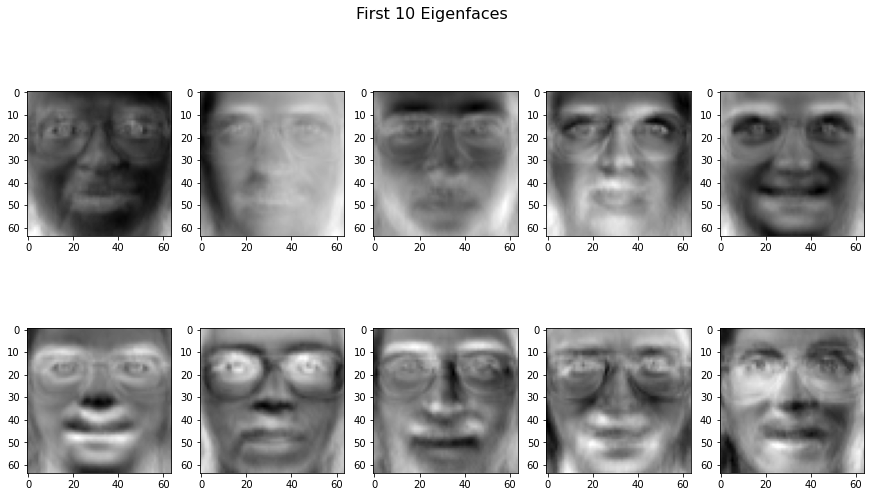

In [15]:
# Plot Eigefaces
fig, axs = plt.subplots(1,3,figsize=(15,8))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(64,64).T
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

Text(0.5, 0.98, 'Reconstruction with Increasing Eigenfaces')

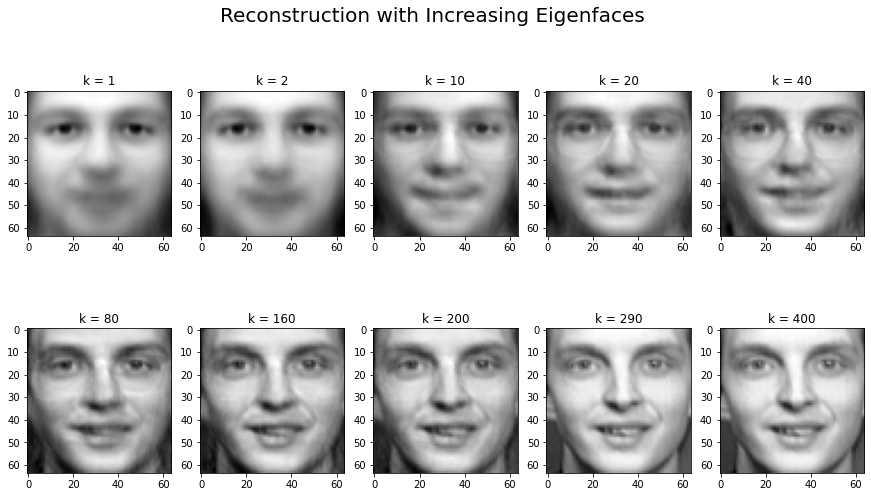

In [16]:
# Plot face in diffrent component
fig, axs = plt.subplots(2,5,figsize=(15,8))
for k, i in zip([0,1,9,19,39,79,159,199,289,399],np.arange(10)):
    # Reconstruct the first picture whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    #print(weight, weight.shape)
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(64,64).T+mean_face.reshape(64,64).T,cmap='gray')
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=20)

Text(0.5, 0.98, 'Reconstruction with Increasing Eigenfaces')

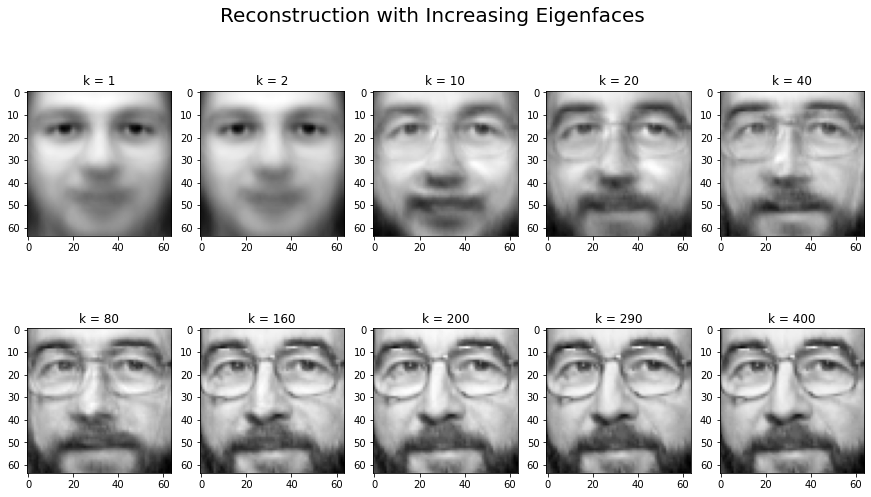

In [17]:
# Plot face in diffrent component
fig, axs = plt.subplots(2,5,figsize=(15,8))
for k, i in zip([0,1,9,19,39,79,159,199,289,399],np.arange(10)):
    # Reconstruct the 10th picture whose index is 9.
    weight = faces_norm[10,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(64,64).T+mean_face.reshape(64,64).T,cmap='gray')
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=20)

Text(0.5, 0.98, 'Reconstruction with 290 component')

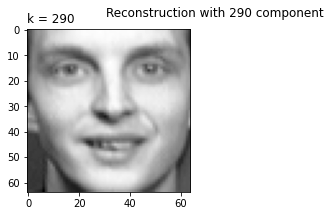

In [19]:
# Plot the best component == 290
fig, axs = plt.subplots(3,1,figsize=(3,3))
weight = faces_norm[0,:].dot(eigen_vecs[:,:289]) # Get PC scores of the images
#print(weight, weight.shape)
projected_face = weight.dot(eigen_vecs[:,:289].T) # Reconstruct first face in dataset using k PCs
ax = plt.subplot(1,1,1)
ax.set_title("k = "+str(290),loc='left')
plt.imshow(projected_face.reshape(64,64).T+mean_face.reshape(64,64).T, cmap='gray')
fig.suptitle(("Reconstruction with 290 component"),horizontalalignment='left', fontsize=12)